# Car type from images recognition Proof Of Concept

## Introduction
To build end to end Car type recognition software for images and videos. There are following things that I observed:
1. Since I have to detect Car Type in each dataset, this is an object detection problem
2. Dataset can be images or videos
3. Number of car type are: Hatchback, Sedan, SUV, StationWagon, Convertible, VanPickup.



## Overview
1. **Create training dataset**

Since dataset was not given, I used google image search as source of dataset. I search Cary type in google image search and downloaded ~300 images of each category. I used Firefox addon to download all images at bulk.

2. **Deep Neural Network Architecture**

Since object dectection and recognition is standard problem and SOTA architecture exist. So I prefer to use YOLOv3 architecture for object detection and recognition.

3. **Creating Labels**

I used pre-trained YOLOv3 architecture to generate bounding boxes around cars and assigned with suitable class there after. This eliminated my time to manually drawing bounding boxes

4. **Training Network**

I used 6 six categories with ~1800 labeled bounding boxes datasets.

5. **Training Hardware**

Training YOlOv3 is GPU extensive task. I don't have a GPU pc so I used google's Colab to train my network. It comes with 12 GB of GPU with latest Nvidia GPU.



In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import glob
import seaborn as sns

## Dataset
1. Exploring datasets

In [14]:
path_data = 'data'
path_sedan = os.path.join(path_data, 'Sedan')
path_suv = os.path.join(path_data, 'SUV')
path_hatchback = os.path.join(path_data, 'Hatchback')
path_convertible = os.path.join(path_data, 'Convertible')
path_stationwagon = os.path.join(path_data, 'StationWagon')
path_vanpickup = os.path.join(path_data, 'VanPickup')

In [5]:
def get_montage(path_image, count=15):
    images = []
    size = 0
    for root, dirs, files in os.walk(path_image):   
        for file in files:
            images.append(mpimg.imread(os.path.join(root, file)))
            size = size + 1
            if size > count:
                return images
    return images
        

Text(0.5, 1.0, 'Sedan')

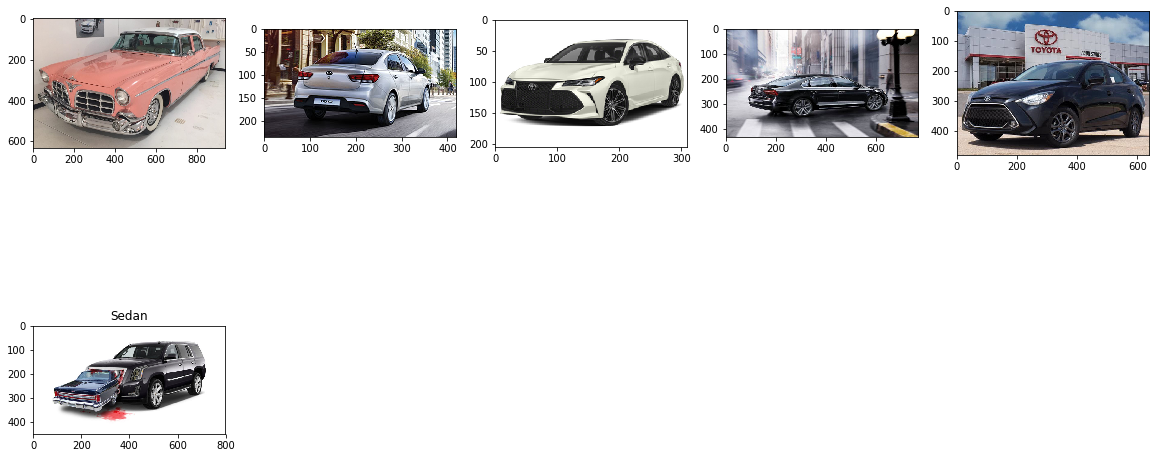

In [29]:
sedan_images = get_montage(path_sedan, count = 5)
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(sedan_images):
    plt.subplot(len(sedan_images) / columns + 1, columns, i + 1)
    plt.imshow(image)
plt.title('Sedan')

Text(0.5, 1.0, 'Hatchback')

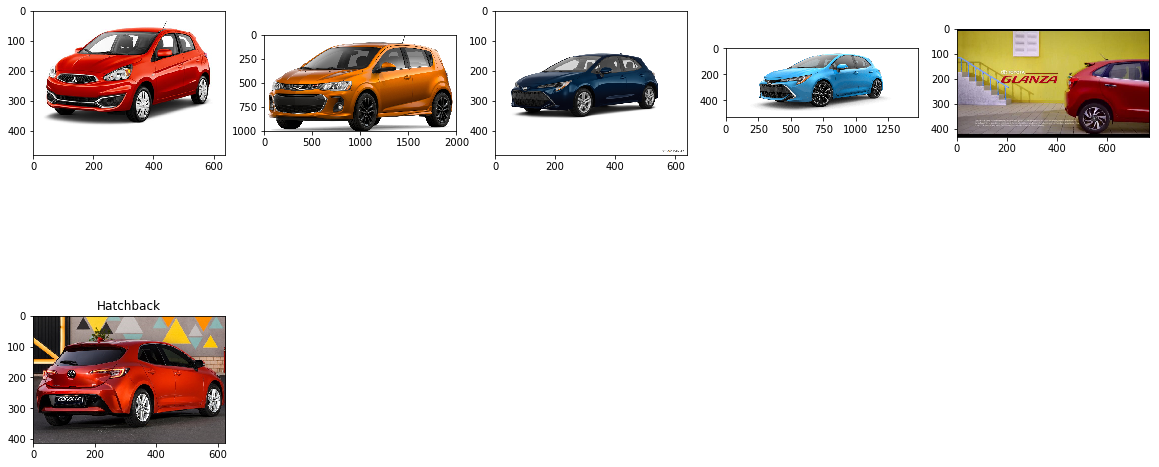

In [30]:
hatchback_images = get_montage(path_hatchback, count = 5)
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(hatchback_images):
    plt.subplot(len(hatchback_images) / columns + 1, columns, i + 1)
    plt.imshow(image)
plt.title('Hatchback')

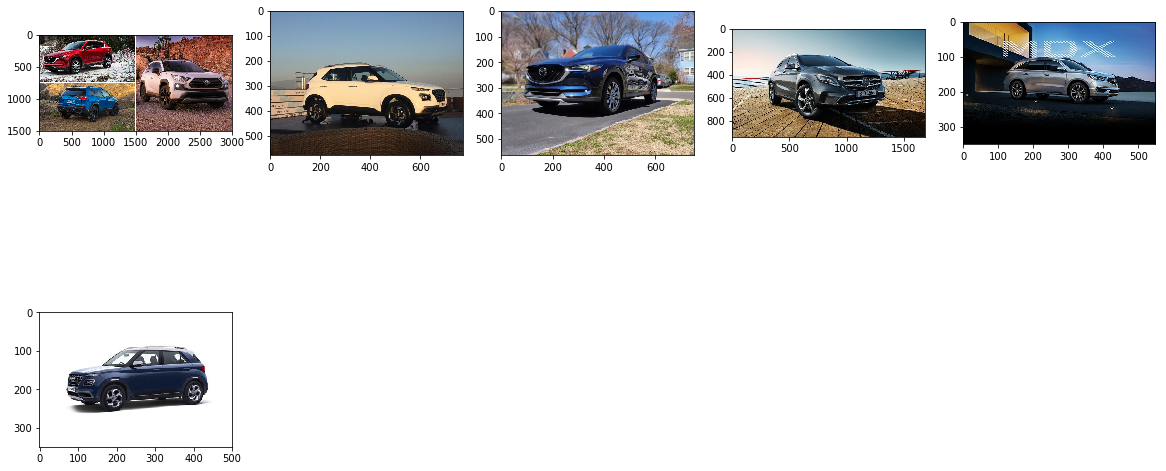

In [31]:
suv_images = get_montage(path_suv, count = 5)
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(suv_images):
    plt.subplot(len(suv_images) / columns + 1, columns, i + 1)
    plt.imshow(image)
    plt.title('SUV')

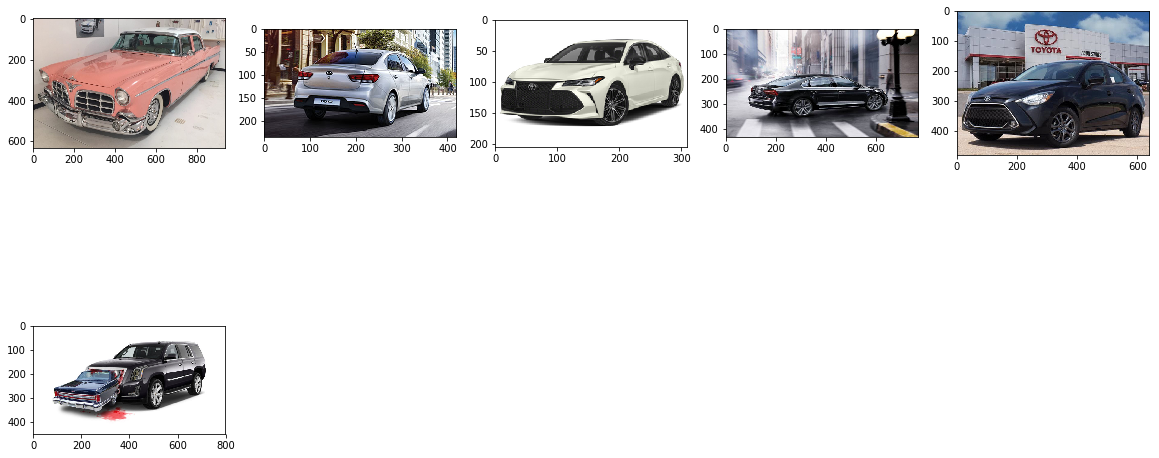

In [32]:
convertible_images = get_montage(path_convertible, count = 5)
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(sedan_images):
    plt.subplot(len(sedan_images) / columns + 1, columns, i + 1)
    plt.imshow(image)
    plt.title('Sedan')

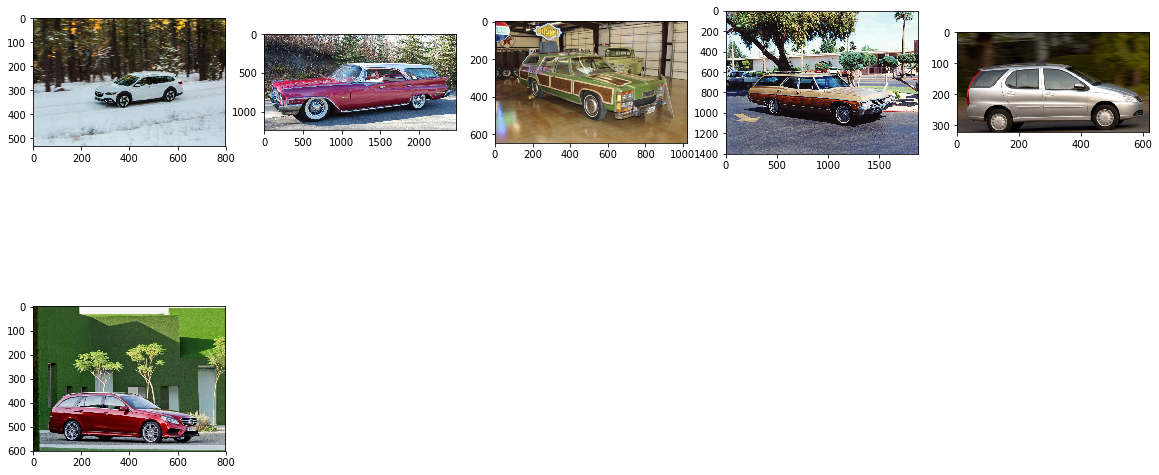

In [33]:
stationwagon_images = get_montage(path_stationwagon, count = 5)
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(stationwagon_images):
    plt.subplot(len(stationwagon_images) / columns + 1, columns, i + 1)
    plt.imshow(image)
    plt.title('StationWagon')

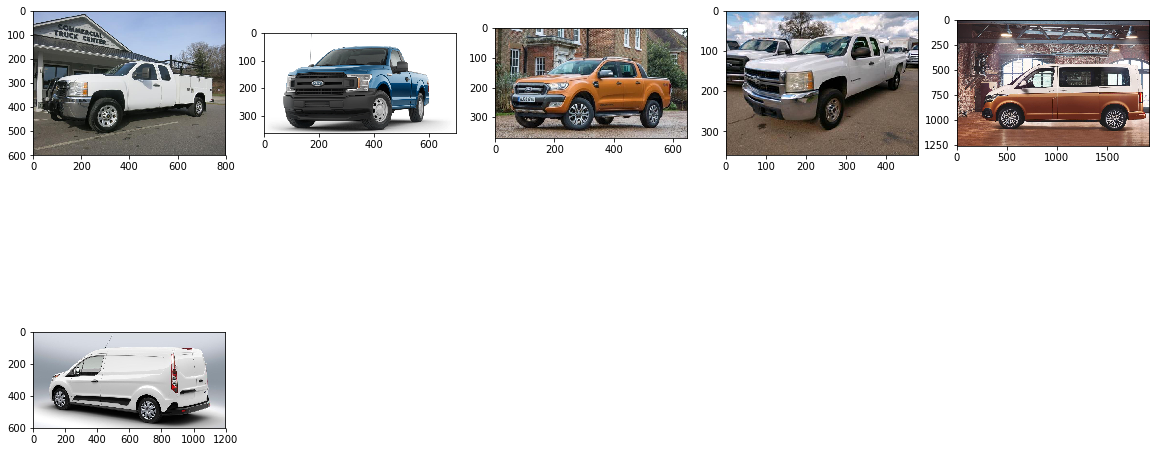

In [34]:
vanpickup_images = get_montage(path_vanpickup, count = 5)
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(vanpickup_images):
    plt.subplot(len(vanpickup_images) / columns + 1, columns, i + 1)
    plt.imshow(image)
    plt.title('Van Pickup')

## Extracting bounding Boxes 
1. I used pre-trained yolo weights to extract bounding box of each car
https://github.com/ManishSahu53/YoloV3
2. I used thses bounding boxes and appending categories to each car (hatchback, sedan, etc) 
3. In this way I could save time in automatically marking bounding boxes instead of manually doing it.

In [ ]:
# !python test.py --image data/test/ --model model_data/yolo.h5 --classes model_data/coco_classes.txt --output data/predict_car/

In [39]:
path_original = 'data/original/'

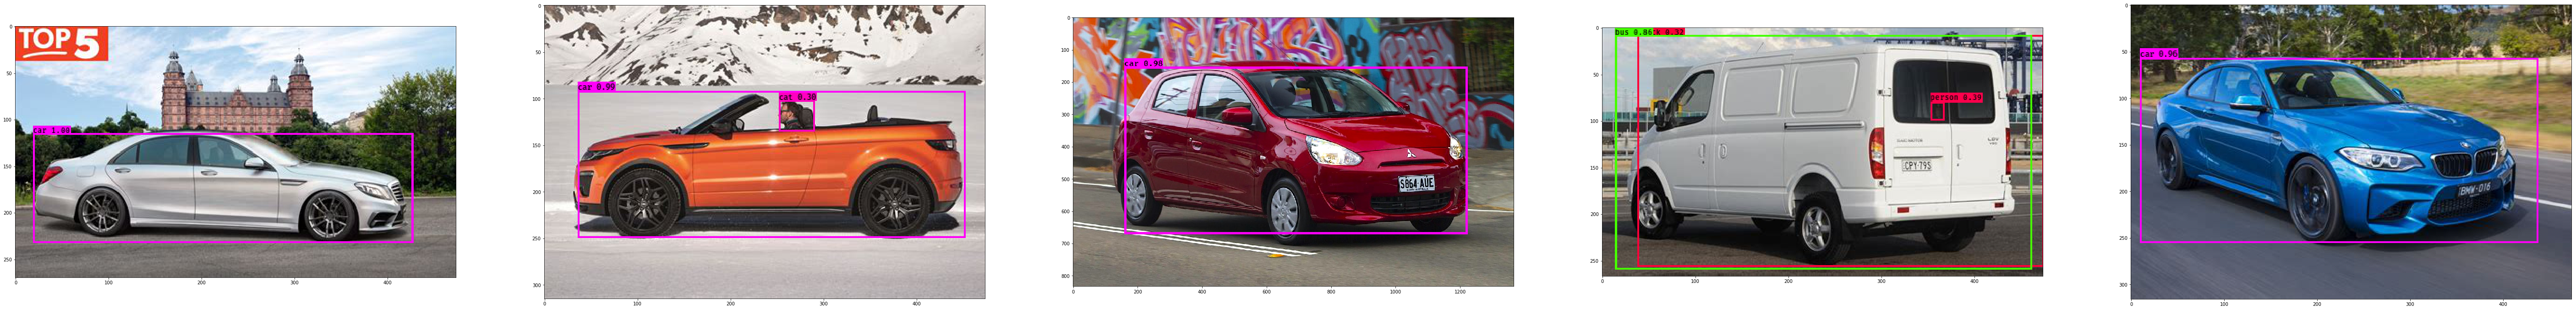

In [42]:
bbox_images = get_montage(path_original, count = 5)
plt.figure(figsize=(100,100))
columns = 5
for i, image in enumerate(bbox_images):
    plt.subplot(len(bbox_images) / columns + 1, columns, i + 1)
    plt.imshow(image)

## Converting this bounding boxes into yolo compatile format
1. I worte a function (car_annotation.py) what could take bounding boxes generated from original yolo and convert it into suitable format.
2. Refer to file (all.txt)


In [38]:
#python car_annotationts.py

## Retraining Yolo based on new class labels
1. I then re-trained yolo network based on new classes and labels
2. Colab Notebook is given here - https://colab.research.google.com/drive/1wnnWwtzdP-FN6rlSr5LbjQ_UuU2dvcRQ

## Steps to re-train model on Colab
1. Download Yolov3 from https://github.com/ManishSahu53/YoloV3
2. Download pre-trained weights
3. Upload all the car types images to google drive
4. Mount Google drive on Colab 
5. Generate annotations file (all.txt) from car_annotations.py function
6. Re-train Yolo based on new dataset, new classes
7. Test model

## Results
Results obtained after retraining model is given below

In [45]:
path_result = 'data/predict/'

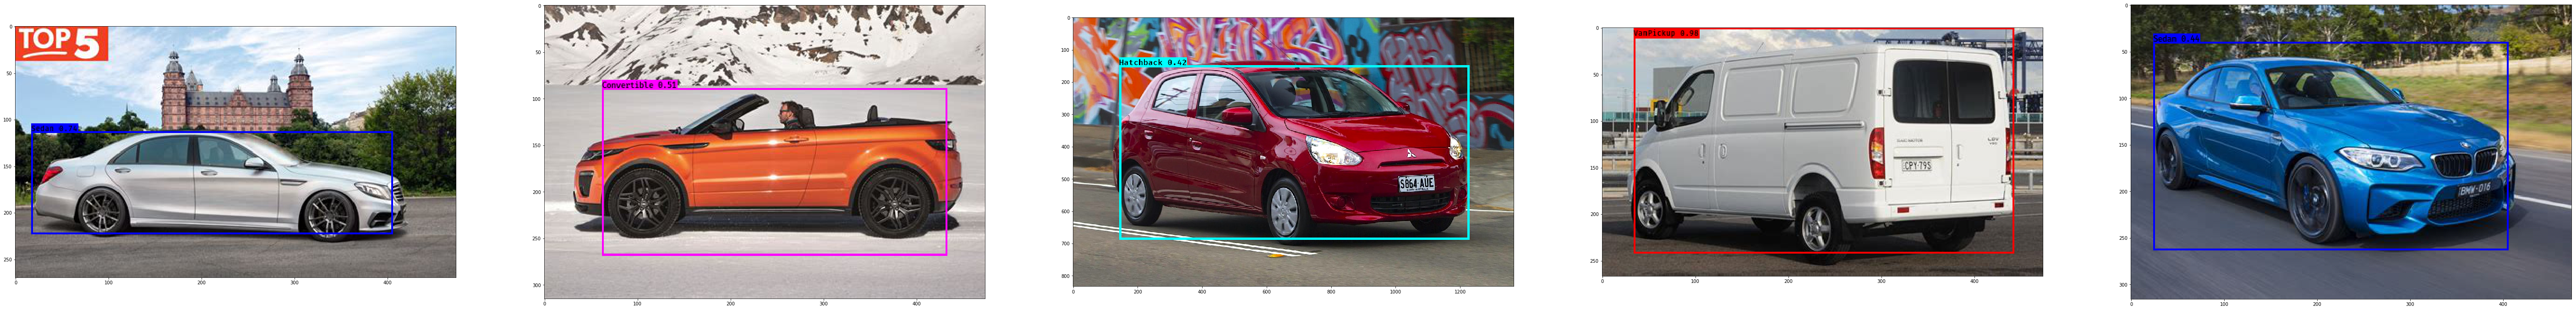

In [46]:
bbox_images = get_montage(path_result, count = 5)
plt.figure(figsize=(100,100))
columns = 5
for i, image in enumerate(bbox_images):
    plt.subplot(len(bbox_images) / columns + 1, columns, i + 1)
    plt.imshow(image)

## Run Bbox.py to return output as CSV 
CSV file will contain labels and bounding boxes and car present in the image.


## Accuracy
Reporting accuracy of the classification

1. Sedan  >85%
2. Convertible  >85%
3. Hatchback  >90%
4. SUV > 95%
5. Van Pickup  >90%
6. StationWagon ~55%

## Limitations
Following are limitations that I have realised:
1. Increase in quality of dataset. Generally front angle and only single car is present in the picture. Pictures from all around the car should be taken
2. StationWagon category is performing poor. It often classify station wagon as Sedan. Dataset of StationWagon should be improved
3. Pre-processing like cliping, fliping, rotating can be used to increase dataset and generelise well. Since GPU is limitation, it is not performed
